In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df_image_fitzpatrick_new = pd.read_csv('datasets/fitzpatrick/fitzpatrick_with_recommendation.csv')
df_image_fitzpatrick_new.head()

,file,age,gender,race,phototype,hsv_mean_h,hsv_mean_s,hsv_mean_v,hsl_mean_h,hsl_mean_s,...,hsl_median_l,hsv_mode_h,hsv_mode_s,hsv_mode_v,hsl_mode_h,hsl_mode_s,hsl_mode_l,hsv_mean_v_percentage,product,Value
0,1.jpg,50-59,Male,East Asian,III,19.829241,137.944695,59.733877,19.805764,43.699139,...,94.0,8,125,60,13,42,85,0.234250,Tan (tan skin w/ neutral undertones),0.866667
1,10.jpg,30-39,Male,Middle Eastern,V,46.377611,66.848653,182.818818,46.495516,159.473434,...,74.0,2,63,208,2,184,77,0.716937,Tan (tan skin w/ neutral undertones),0.866667
2,100.jpg,20-29,Female,East Asian,III,18.022879,77.726981,227.602320,19.009347,193.497987,...,150.0,7,68,239,7,207,117,0.892558,Tan (tan skin w/ neutral undertones),0.866667
3,1000.jpg,30-39,Male,White,I & II,160.481166,85.828245,118.044105,160.467235,98.868762,...,56.0,174,90,94,174,76,55,0.462918,Tan (tan skin w/ neutral undertones),0.866667
4,10004.jpg,40-49,Male,Indian,V,12.648039,101.791016,141.452208,12.642140,113.252232,...,67.0,12,102,136,12,100,65,0.554715,Tan (tan skin w/ neutral undertones),0.866667


# Using only 3000 samples from each product class

In [3]:
df_image_fitzpatrick_new.get("product").unique()

array(['Tan (tan skin w/ neutral undertones)',
       'Dark Neutral (medium dark skin w/ neutral undertones)',
       'Fair Golden (fair skin w/ neutral or golden undertones)',
       'Fair Pink (fair skin w/ neutral or pink undertones)',
       'Medium Neutral (medium skin w/ neutral undertones)',
       'Medium Golden (medium skin w/ golden undertones)'], dtype=object)

In [4]:
df_image_fitzpatrick_new.get("product").value_counts()

product
Tan (tan skin w/ neutral undertones)                       38531
Dark Neutral (medium dark skin w/ neutral undertones)        634
Fair Golden (fair skin w/ neutral or golden undertones)      318
Fair Pink (fair skin w/ neutral or pink undertones)          264
Medium Neutral (medium skin w/ neutral undertones)           115
Medium Golden (medium skin w/ golden undertones)              77
Name: count, dtype: int64

In [5]:
df_image_fitzpatrick_new = df_image_fitzpatrick_new.groupby('product').head(3000)

In [6]:
df_image_fitzpatrick_new.get("product").value_counts()

product
Tan (tan skin w/ neutral undertones)                       3000
Dark Neutral (medium dark skin w/ neutral undertones)       634
Fair Golden (fair skin w/ neutral or golden undertones)     318
Fair Pink (fair skin w/ neutral or pink undertones)         264
Medium Neutral (medium skin w/ neutral undertones)          115
Medium Golden (medium skin w/ golden undertones)             77
Name: count, dtype: int64

In [7]:
le_fitzpatrick = LabelEncoder()
df_image_fitzpatrick_new['phototype'] = le_fitzpatrick.fit_transform(df_image_fitzpatrick_new['phototype'])

In [8]:
df_image_fitzpatrick_new

,file,age,gender,race,phototype,hsv_mean_h,hsv_mean_s,hsv_mean_v,hsl_mean_h,hsl_mean_s,...,hsl_median_l,hsv_mode_h,hsv_mode_s,hsv_mode_v,hsl_mode_h,hsl_mode_s,hsl_mode_l,hsv_mean_v_percentage,product,Value
0,1.jpg,50-59,Male,East Asian,1,19.829241,137.944695,59.733877,19.805764,43.699139,...,94.0,8,125,60,13,42,85,0.234250,5,0.866667
1,10.jpg,30-39,Male,Middle Eastern,3,46.377611,66.848653,182.818818,46.495516,159.473434,...,74.0,2,63,208,2,184,77,0.716937,5,0.866667
2,100.jpg,20-29,Female,East Asian,1,18.022879,77.726981,227.602320,19.009347,193.497987,...,150.0,7,68,239,7,207,117,0.892558,5,0.866667
3,1000.jpg,30-39,Male,White,0,160.481166,85.828245,118.044105,160.467235,98.868762,...,56.0,174,90,94,174,76,55,0.462918,5,0.866667
4,10004.jpg,40-49,Male,Indian,3,12.648039,101.791016,141.452208,12.642140,113.252232,...,67.0,12,102,136,12,100,65,0.554715,5,0.866667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39747,7691.jpg,50-59,Male,Latino_Hispanic,2,13.260304,85.742805,242.853755,13.257314,202.545121,...,221.0,14,86,255,14,211,255,0.952368,4,0.952941
39761,7754.jpg,30-39,Male,Latino_Hispanic,2,73.487803,50.690410,237.549506,73.485013,214.267678,...,160.0,1,54,247,1,222,255,0.931567,1,0.945098
39791,7882.jpg,20-29,Male,East Asian,1,14.808494,76.739935,230.560368,14.792490,198.330118,...,188.0,8,25,255,8,241,255,0.904158,0,0.937255
39869,8438.jpg,20-29,Female,Black,4,14.819097,118.719069,235.075793,14.815868,181.457749,...,230.0,21,98,253,21,201,255,0.921866,1,0.945098


In [9]:
df_image_fitzpatrick_new.describe().T

,count,mean,std,min,25%,50%,75%,max
phototype,4408.0,1.832577,1.354923,0.000000,1.000000,2.000000,3.000000,4.000000
hsv_mean_h,4408.0,21.261179,30.564361,0.000000,8.503886,10.982611,16.398936,176.743941
hsv_mean_s,4408.0,110.441827,40.401578,0.000000,81.583312,108.426319,136.755924,253.101802
hsv_mean_v,4408.0,176.369966,55.475214,24.176359,133.082923,176.289969,233.309491,253.330895
hsl_mean_h,4408.0,21.532404,30.850350,0.000000,8.531140,11.050373,16.607003,176.737364
hsl_mean_s,4408.0,140.648009,50.290355,18.647461,100.932542,137.394611,185.748097,250.905174
hsl_mean_l,4408.0,132.274265,56.787216,0.000000,86.675278,121.242805,183.813716,252.303013
hsv_median_h,4408.0,17.571915,35.543545,0.000000,7.000000,9.000000,12.000000,178.000000
hsv_median_s,4408.0,109.827473,41.911739,0.000000,80.000000,108.000000,136.250000,255.000000
hsv_median_v,4408.0,180.693172,58.481103,22.000000,135.000000,181.500000,241.000000,255.000000


In [12]:
df_image_fitzpatrick_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4408 entries, 0 to 39875
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   file                   4408 non-null   object 
 1   age                    4408 non-null   object 
 2   gender                 4408 non-null   object 
 3   race                   4408 non-null   object 
 4   phototype              4408 non-null   int64  
 5   hsv_mean_h             4408 non-null   float64
 6   hsv_mean_s             4408 non-null   float64
 7   hsv_mean_v             4408 non-null   float64
 8   hsl_mean_h             4408 non-null   float64
 9   hsl_mean_s             4408 non-null   float64
 10  hsl_mean_l             4408 non-null   float64
 11  hsv_median_h           4408 non-null   float64
 12  hsv_median_s           4408 non-null   float64
 13  hsv_median_v           4408 non-null   float64
 14  hsl_median_h           4408 non-null   float64
 15  hsl_medi

In [13]:
df_image_fitzpatrick_new["phototype"].value_counts()

phototype
3    1298
0    1048
1     868
2     730
4     464
Name: count, dtype: int64


# K-Nearest Neighbors Fitzpatrick Skin Type

In [14]:
features_fitzpatrick = [
    "hsv_mean_h",
    "hsv_mean_s",
    "hsv_mean_v",
]
selected_fitzpatrick = df_image_fitzpatrick_new[features_fitzpatrick]

<Axes: >

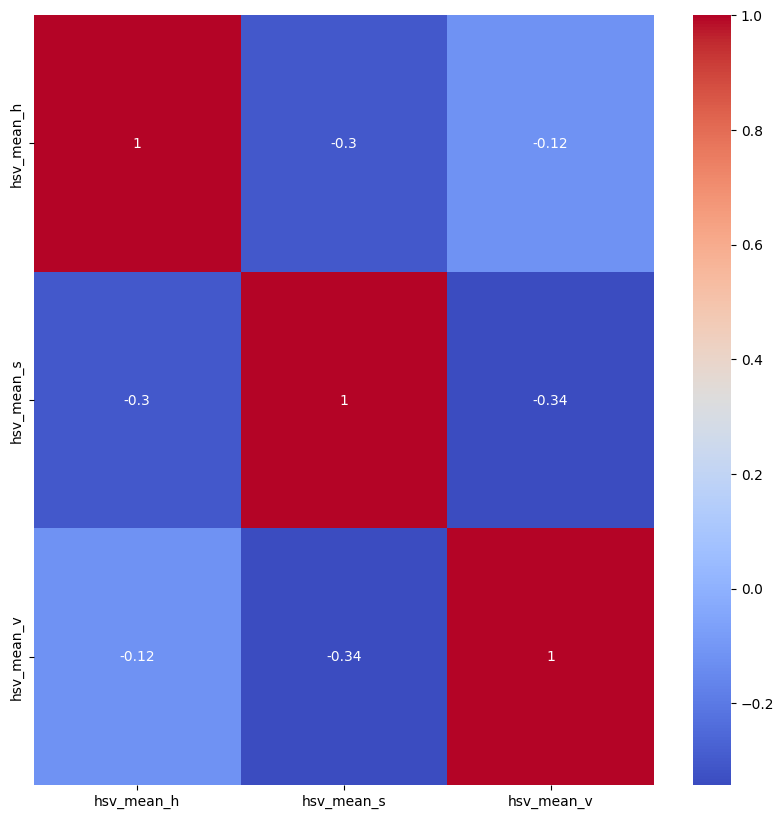

In [15]:
plt.figure(figsize=(10, 10))
sns.heatmap(selected_fitzpatrick.corr(), annot=True, cmap="coolwarm")

In [16]:
sc_fitzpatrick = StandardScaler()
sc_fitzpatrick.fit(selected_fitzpatrick)
X_fitzpatrick = pd.DataFrame(sc_fitzpatrick.transform(selected_fitzpatrick), columns=features_fitzpatrick)
X_fitzpatrick

,hsv_mean_h,hsv_mean_s,hsv_mean_v
0,-0.046855,0.680815,-2.102729
1,0.821849,-1.079119,0.116261
2,-0.105962,-0.809834,0.923623
3,4.555495,-0.609292,-1.051505
4,-0.281835,-0.214145,-0.629501
...,...,...,...
4403,-0.261801,-0.611407,1.198577
4404,1.708936,-1.479106,1.102952
4405,-0.211142,-0.834267,0.976951
4406,-0.210795,0.204897,1.058355


In [17]:
y_fitzpatrick_phototype = df_image_fitzpatrick_new["phototype"]

In [18]:
y_fitzpatrick_phototype

0        1
1        3
2        1
3        0
4        3
        ..
39747    2
39761    2
39791    1
39869    4
39875    1
Name: phototype, Length: 4408, dtype: int64

In [19]:
X_train_fitzpatrick_phototype, X_test_fitzpatrick_phototype, y_train_fitzpatrick_phototype, y_test_fitzpatrick_phototype = train_test_split(X_fitzpatrick, y_fitzpatrick_phototype, test_size=0.3, random_state=42)

In [20]:
train_scores_fitzpatrick_phototype = np.array([])
test_scores_fitzpatrick_phototype = np.array([])

for i in range(1, 26):
    knn_phototype = KNeighborsClassifier(n_neighbors=i)
    knn_phototype.fit(X_train_fitzpatrick_phototype, y_train_fitzpatrick_phototype)

    train_scores_fitzpatrick_phototype = np.append(train_scores_fitzpatrick_phototype, knn_phototype.score(X_train_fitzpatrick_phototype, y_train_fitzpatrick_phototype))
    test_scores_fitzpatrick_phototype = np.append(test_scores_fitzpatrick_phototype, knn_phototype.score(X_test_fitzpatrick_phototype, y_test_fitzpatrick_phototype))

In [21]:
max_train_score_fitzpatrick_phototype = np.max(train_scores_fitzpatrick_phototype)
train_scores_ind_fitzpatrick_phototype = np.where(train_scores_fitzpatrick_phototype == max_train_score_fitzpatrick_phototype)[0][0]
print(f"Max train score on Phototype Features {max_train_score_fitzpatrick_phototype*100:.2f}% at k = {train_scores_ind_fitzpatrick_phototype+1}")

Max train score on Phototype Features 100.00% at k = 1


In [22]:
print("All train scores on Photoype Features:")
for i, score in enumerate(train_scores_fitzpatrick_phototype):
    print(f"K = {i+1} :: {score*100:.2f}%")

All train scores on Photoype Features:
K = 1 :: 100.00%
K = 2 :: 64.25%
K = 3 :: 59.19%
K = 4 :: 54.75%
K = 5 :: 51.83%
K = 6 :: 49.56%
K = 7 :: 48.53%
K = 8 :: 47.36%
K = 9 :: 46.48%
K = 10 :: 46.13%
K = 11 :: 45.09%
K = 12 :: 44.25%
K = 13 :: 44.15%
K = 14 :: 44.02%
K = 15 :: 42.69%
K = 16 :: 43.27%
K = 17 :: 43.50%
K = 18 :: 42.59%
K = 19 :: 42.72%
K = 20 :: 42.63%
K = 21 :: 42.30%
K = 22 :: 42.27%
K = 23 :: 41.75%
K = 24 :: 42.37%
K = 25 :: 41.82%


In [23]:
max_test_score_fitzpatrick_phototype = np.max(test_scores_fitzpatrick_phototype)
test_scores_ind_fitzpatrick_phototype = np.where(test_scores_fitzpatrick_phototype == max_test_score_fitzpatrick_phototype)[0][0]
print(f"Max test score on Phototype Features {max_test_score_fitzpatrick_phototype*100:.2f}% at k = {test_scores_ind_fitzpatrick_phototype+1}")

Max test score on Phototype Features 35.22% at k = 25


In [24]:
print("All test scores on Photoype Features:")
for i, score in enumerate(test_scores_fitzpatrick_phototype):
    print(f"K = {i+1} :: {score*100:.2f}%")

All test scores on Photoype Features:
K = 1 :: 26.46%
K = 2 :: 26.76%
K = 3 :: 27.59%
K = 4 :: 30.08%
K = 5 :: 30.23%
K = 6 :: 31.82%
K = 7 :: 31.07%
K = 8 :: 32.05%
K = 9 :: 30.99%
K = 10 :: 32.88%
K = 11 :: 33.48%
K = 12 :: 34.47%
K = 13 :: 33.11%
K = 14 :: 34.09%
K = 15 :: 33.48%
K = 16 :: 33.48%
K = 17 :: 33.86%
K = 18 :: 33.03%
K = 19 :: 33.41%
K = 20 :: 33.71%
K = 21 :: 33.94%
K = 22 :: 34.16%
K = 23 :: 34.69%
K = 24 :: 34.47%
K = 25 :: 35.22%


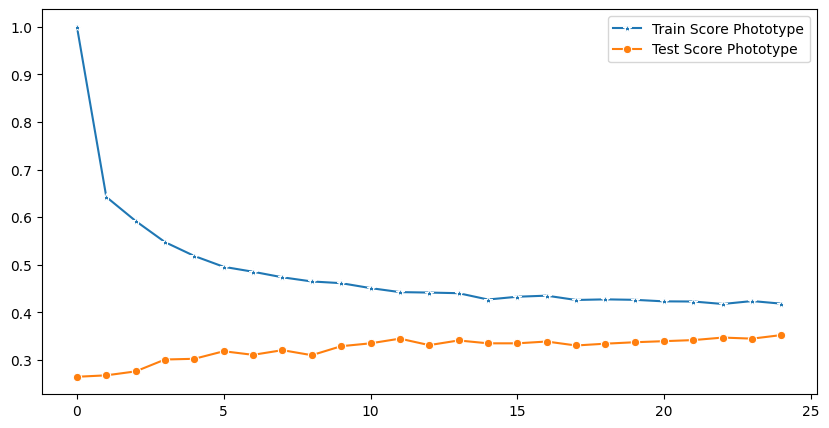

In [25]:
plt.figure(figsize=(10, 5))
line_fitzpatrick_phototype = sns.lineplot(train_scores_fitzpatrick_phototype, marker="*", label="Train Score Phototype")
line_fitzpatrick_phototype = sns.lineplot(test_scores_fitzpatrick_phototype, marker="o", label="Test Score Phototype")

In [26]:
knn_fitzpatrick_phototype = KNeighborsClassifier(n_neighbors=3)
knn_fitzpatrick_phototype.fit(X_train_fitzpatrick_phototype, y_train_fitzpatrick_phototype)
knn_fitzpatrick_phototype.score(X_test_fitzpatrick_phototype, y_test_fitzpatrick_phototype)

0.2758881330309902

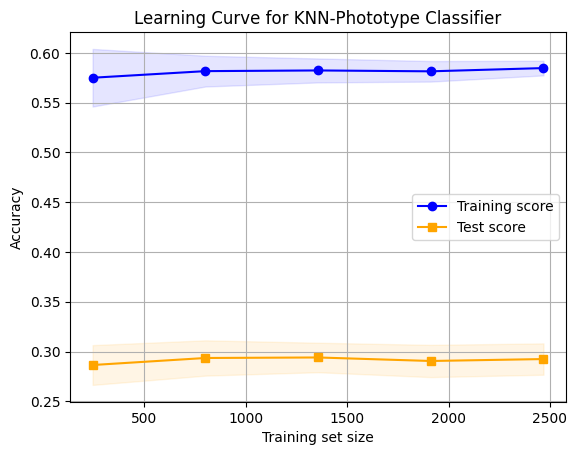

In [27]:
# Define the train_sizes and scoring metric
train_sizes, train_scores, test_scores = learning_curve(
    knn_fitzpatrick_phototype,
    X_train_fitzpatrick_phototype,
    y_train_fitzpatrick_phototype,
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    scoring="accuracy",
)

# Calculate mean and standard deviation for train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, color="blue", marker="o", label="Training score")
plt.fill_between(
    train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue"
)
plt.plot(train_sizes, test_mean, color="orange", marker="s", label="Test score")
plt.fill_between(
    train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="orange"
)

# Set labels and title
plt.xlabel("Training set size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for KNN-Phototype Classifier")
plt.legend()
plt.grid(True)
plt.show()

In [28]:
y_pred_fitzpatrick_phototype = knn_fitzpatrick_phototype.predict(X_test_fitzpatrick_phototype)
print(classification_report(y_test_fitzpatrick_phototype, y_pred_fitzpatrick_phototype))

              precision    recall  f1-score   support

           0       0.25      0.42      0.31       301
           1       0.31      0.31      0.31       268
           2       0.19      0.14      0.16       218
           3       0.34      0.28      0.31       395
           4       0.31      0.11      0.17       141

    accuracy                           0.28      1323
   macro avg       0.28      0.25      0.25      1323
weighted avg       0.28      0.28      0.27      1323



In [29]:
unseen_data_phototype = np.array([21.377610809948976,25.84865274234694,25.8188177614796])
test_unseen_phototype = knn_fitzpatrick_phototype.predict(unseen_data_phototype.reshape(1, -1))
print(f"Predicted Phototype: {le_fitzpatrick.inverse_transform(test_unseen_phototype)[0]}")

Predicted Phototype: I & II


/Users/avv210/Documents/IT/GitHub/fores/venv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [30]:
knn_cv_fitzpatrick_phototype = KNeighborsClassifier(n_neighbors=3)
cv_scores_fitzpatrick_phototype = cross_val_score(knn_cv_fitzpatrick_phototype, X_fitzpatrick, y_fitzpatrick_phototype, cv=25)
print("Cross Validation Score on Phototype")
print(cv_scores_fitzpatrick_phototype)

Cross Validation Score on Phototype
[0.20903955 0.25423729 0.26553672 0.28813559 0.23163842 0.31073446
 0.23728814 0.27683616 0.28409091 0.25568182 0.26704545 0.3125
 0.27272727 0.35227273 0.26704545 0.26136364 0.32954545 0.3125
 0.3125     0.35227273 0.35227273 0.28977273 0.23295455 0.20454545
 0.25568182]


In [31]:
y_pred_fitzpatrick_phototype = knn_fitzpatrick_phototype.predict(X_test_fitzpatrick_phototype)
confusion_matrix(y_test_fitzpatrick_phototype, y_pred_fitzpatrick_phototype)
pd.crosstab(y_test_fitzpatrick_phototype, y_pred_fitzpatrick_phototype, rownames=["True"], colnames=["Predicted"], margins=True)

Predicted,0,1,2,3,4,All
True,,,,,,
0,125,51,40,77,8,301
1,94,83,37,49,5,268
2,89,40,30,55,4,218
3,162,62,42,111,18,395
4,40,33,13,39,16,141
All,510,269,162,331,51,1323


In [32]:
rskf_fitzpatrick_phototype = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

In [34]:
param_grid_fitzpatrick_phototype = {"n_neighbors": np.arange(1, 26)}
knn_fitzpatrick_phototype = KNeighborsClassifier()
knn_gridcv_fitzpatrick_phototype = GridSearchCV(knn_fitzpatrick_phototype, param_grid_fitzpatrick_phototype, cv=rskf_fitzpatrick_phototype)
knn_gridcv_fitzpatrick_phototype.fit(X_fitzpatrick, y_fitzpatrick_phototype)

print(f"Best score Phototype Features: {knn_gridcv_fitzpatrick_phototype.best_score_}")
print(f"Best parameters Phototype Features: {knn_gridcv_fitzpatrick_phototype.best_params_}")

Best score Phototype Features: 0.3610682048074621
Best parameters Phototype Features: {'n_neighbors': 25}


#### Save the Model to Pickle

In [33]:
pd.to_pickle(knn_fitzpatrick_phototype, "models/knn_fitzpatrick_vmean_phototype.pkl")